# Coin Detection
**Name:**harsshitha lakshmanan   **Reg. No:** 212223230075 **Slot** ___________________

# **Coin Detection using Morphological Operations and Thresholding**

## **Aim**
In this project, you will work with an image and apply morphological operations and thresholding techniques to detect and count the total number of coins present in the image.

---
**Note:**
   - **Do not remove intermediate images.**
   - Display all key intermediate images (grayscale, thresholded, binary, morphological result, final detections).
   - Document your findings and observations for each step.
   - Print the total number of coins detected using both **blob detection** and **contour detection** methods.

---

## **Expected Output**
All expected output images and results are already displayed.  
Enter your code only inside the blocks marked as:

```python
### Your Code Here ###


In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## <font style = "color:rgb(50,120,229)"> Step 1: Read Image</font>

In [7]:
# Read image
# Store it in the variable image
###
###
#Your Code Here
###

In [8]:
image = cv2.imread('CoinsA.png')  # <- change filename if needed
assert image is not None, "Image not found. Place 'coins.jpg' in the working directory or change the filename."


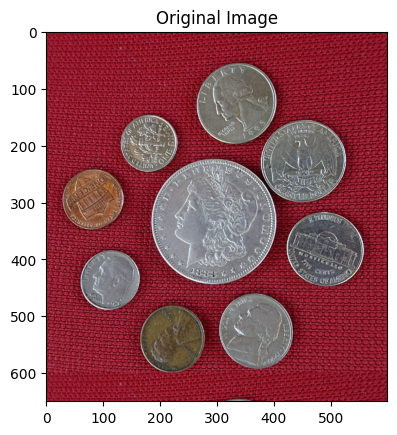

In [9]:
# Dont Change the Code 
imageCopy = image.copy()
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")
plt.show()
# Expected output

## <font style = "color:rgb(50,120,229)">Step 2: Convert Image to Grayscale</font>

In [10]:
# Convert image to grayscale
# Store it in the variable imageGray
###
### YOUR CODE HERE
###

In [11]:
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

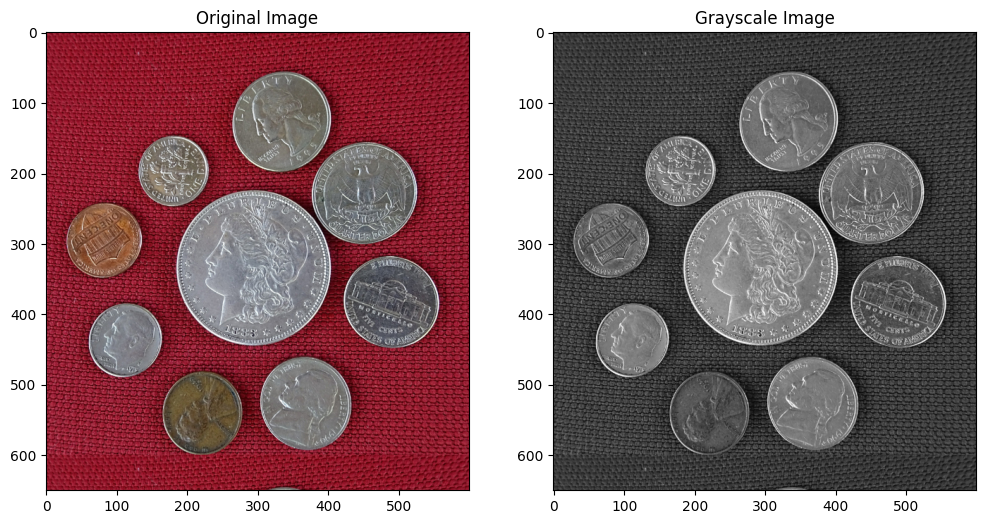

In [12]:
plt.figure(figsize=(12,12))
plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image")
plt.subplot(122); plt.imshow(imageGray,cmap='gray');plt.title("Grayscale Image"); plt.show()
# Expected output

## <font style = "color:rgb(50,120,229)">Step 3: Split Image into R,G,B Channels</font>

In [13]:
# Split cell into channels
# Store them in variables imageB, imageG, imageR
###
### YOUR CODE HERE
###

In [14]:
imageB, imageG, imageR = cv2.split(image)

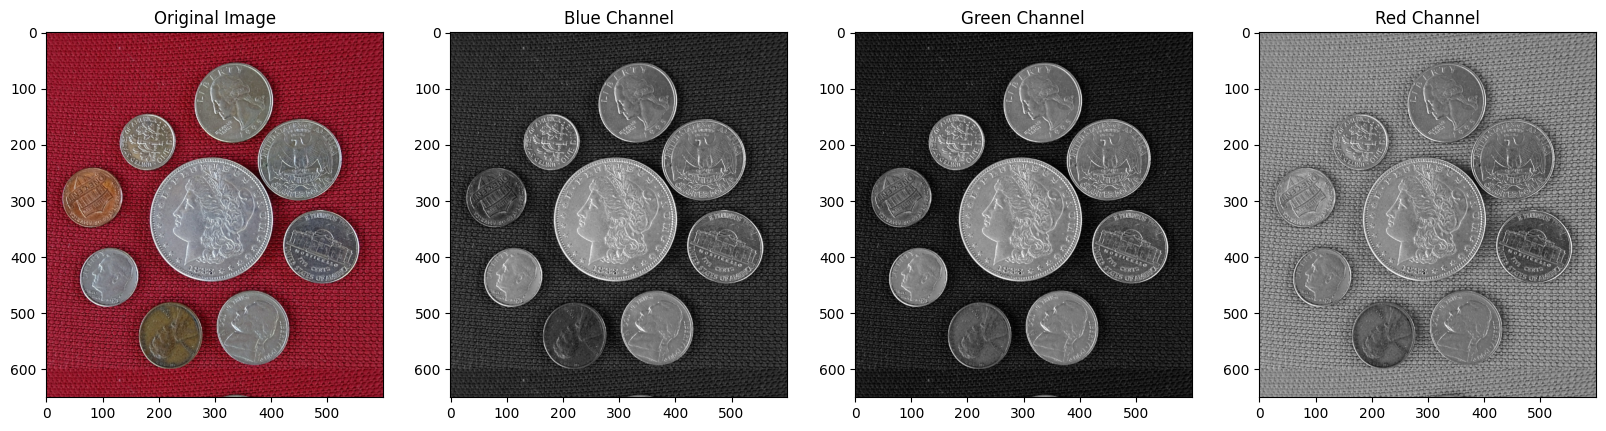

In [15]:
plt.figure(figsize=(20,12))
plt.subplot(141);plt.imshow(image[:,:,::-1]);plt.title("Original Image")
plt.subplot(142);plt.imshow(imageB,cmap='gray');plt.title("Blue Channel")
plt.subplot(143);plt.imshow(imageG,cmap='gray');plt.title("Green Channel")
plt.subplot(144);plt.imshow(imageR,cmap='gray');plt.title("Red Channel");
plt.show()
# Expected output

## <font style = "color:rgb(50,120,229)">Step 4: Perform Thresholding</font>

You will have to carry out this step with different threshold values to see which one suits you the most. Do not remove those intermediate images and make sure to document your findings.

In [16]:
###
### YOUR CODE HERE
###
_, otsuBin = cv2.threshold(imageGray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# 2) Fixed thresholds to compare
fixed_thresholds = [80, 100, 120, 150]
fixed_bins = []
for t in fixed_thresholds:
    _, bin_img = cv2.threshold(imageGray, t, 255, cv2.THRESH_BINARY)
    fixed_bins.append((t, bin_img))

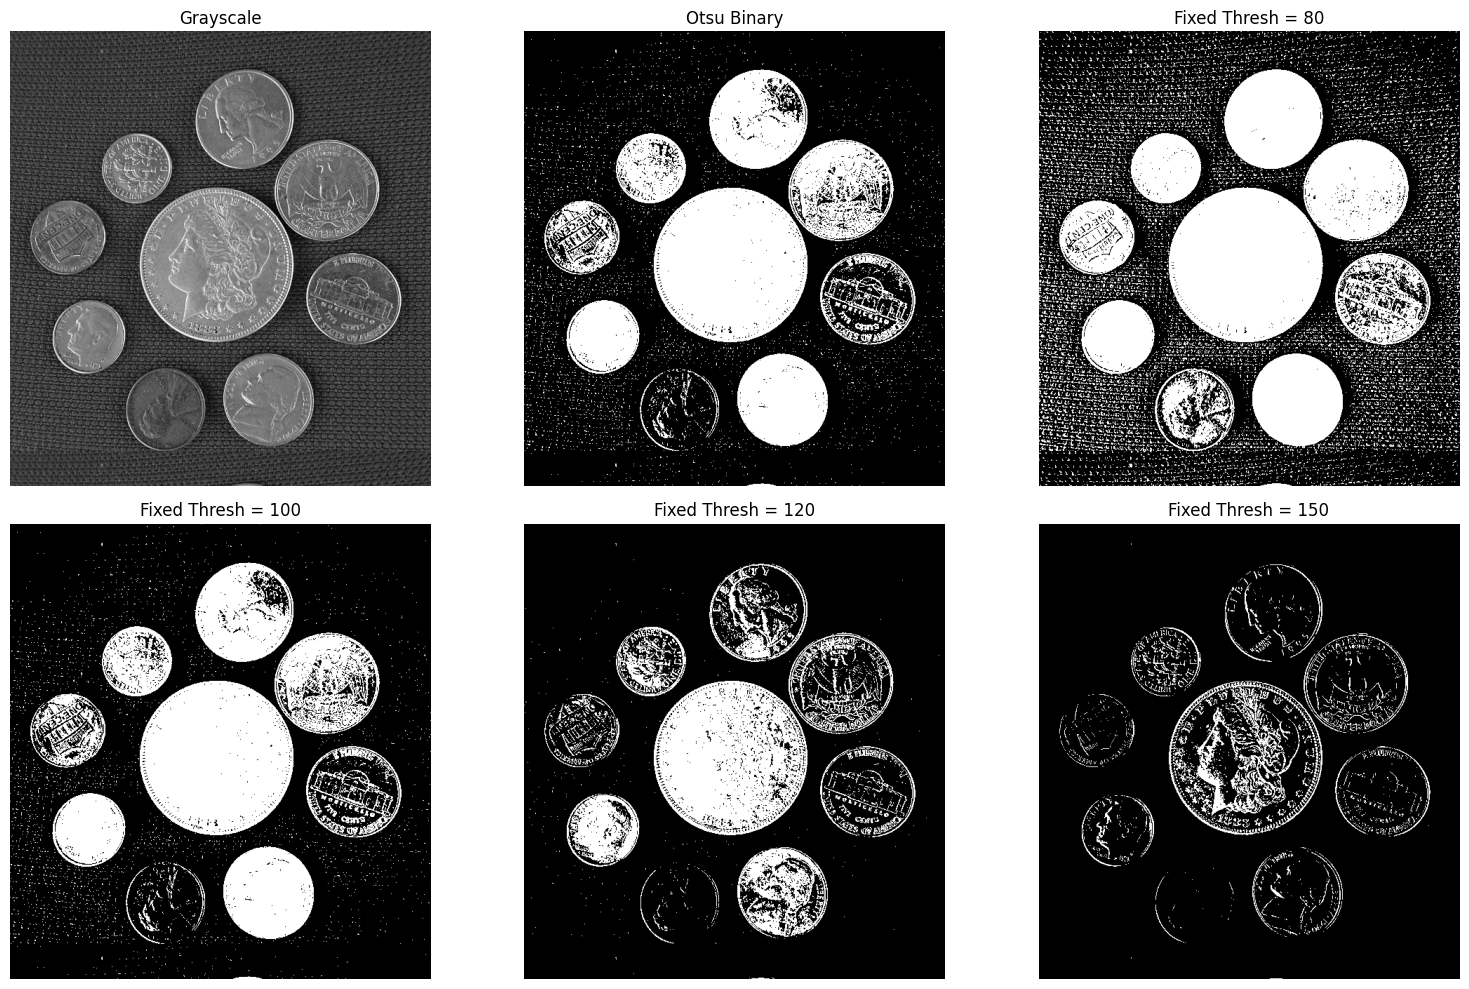

In [17]:
# Display the thresholded image
###
### YOUR CODE HERE
###
# Expected output
plt.figure(figsize=(16,10))
plt.subplot(231); plt.imshow(imageGray, cmap='gray'); plt.title("Grayscale"); plt.axis('off')
plt.subplot(232); plt.imshow(otsuBin, cmap='gray'); plt.title("Otsu Binary"); plt.axis('off')
for i, (t, bin_img) in enumerate(fixed_bins, start=3):
    plt.subplot(2,3,i); plt.imshow(bin_img, cmap='gray'); plt.title(f"Fixed Thresh = {t}"); plt.axis('off')
plt.tight_layout(); plt.show()

In [18]:
binary = otsuBin.copy()


## <font style = "color:rgb(50,120,229)">Step 5: Perform morphological operations</font>

You will have to carry out this step with different kernel size, kernel shape and morphological operations to see which one (or more) suits you the most. Do not remove those intermediate images and make sure to document your findings.

In [19]:
###
### YOUR CODE HERE
###

In [20]:
###
### YOUR CODE HERE
###

In [21]:
kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
kernel3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7))

In [ ]:
imageOpened_3 = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel1, iterations=1)
imageOpened_5 = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel2, iterations=1)

In [24]:
imageClosed_3 = cv2.morphologyEx(imageOpened_5, cv2.MORPH_CLOSE, kernel1, iterations=1)
imageClosed_5 = cv2.morphologyEx(imageOpened_5, cv2.MORPH_CLOSE, kernel2, iterations=1)

In [25]:
imageDilated1 = cv2.dilate(imageClosed_5, kernel2, iterations=1)
imageDilated2 = cv2.dilate(imageClosed_5, kernel2, iterations=2)

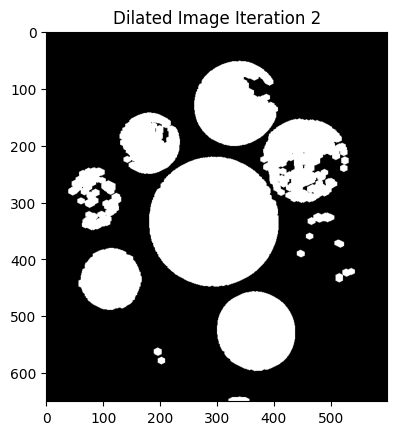

In [26]:
###
### YOUR CODE HERE
###
plt.imshow(imageDilated2,cmap='gray');plt.title('Dilated Image Iteration 2');plt.show()
# Expected output

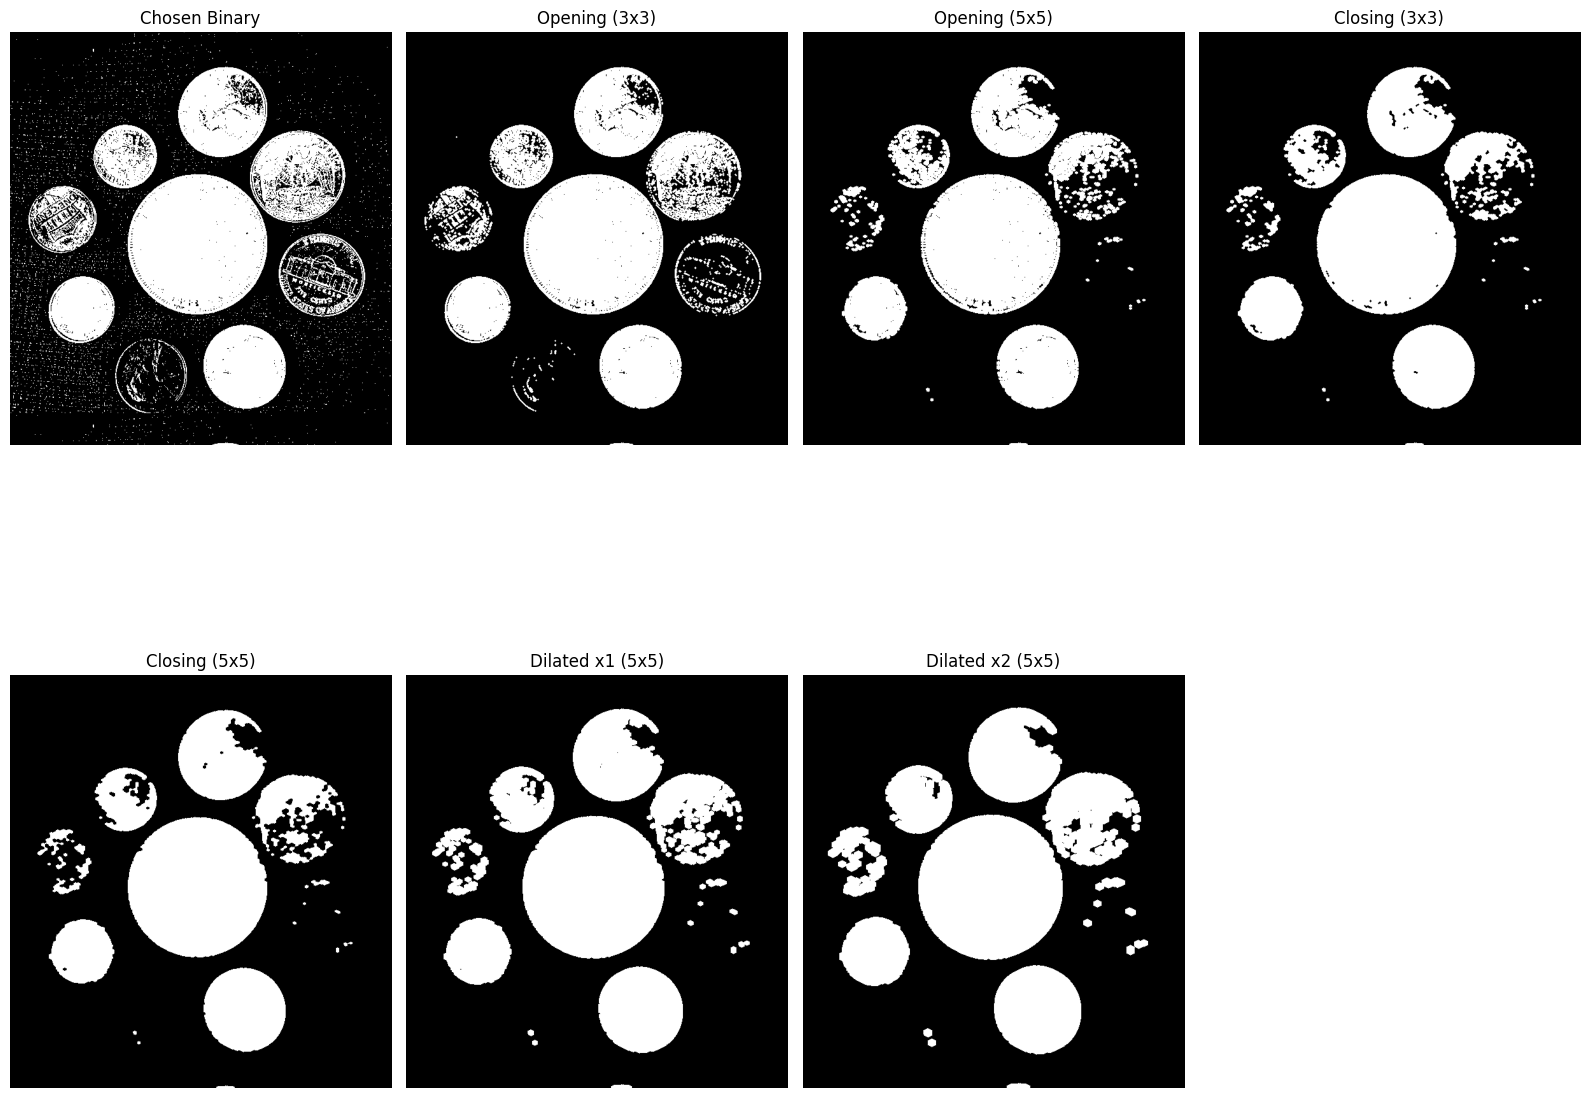

In [27]:
# Display all the images
# you have obtained in the intermediate steps
###
### YOUR CODE HERE
###
plt.figure(figsize=(16,14))
plt.subplot(241); plt.imshow(binary, cmap='gray'); plt.title("Chosen Binary"); plt.axis('off')
plt.subplot(242); plt.imshow(imageOpened_3, cmap='gray'); plt.title("Opening (3x3)"); plt.axis('off')
plt.subplot(243); plt.imshow(imageOpened_5, cmap='gray'); plt.title("Opening (5x5)"); plt.axis('off')
plt.subplot(244); plt.imshow(imageClosed_3, cmap='gray'); plt.title("Closing (3x3)"); plt.axis('off')
plt.subplot(245); plt.imshow(imageClosed_5, cmap='gray'); plt.title("Closing (5x5)"); plt.axis('off')
plt.subplot(246); plt.imshow(imageDilated1, cmap='gray'); plt.title("Dilated x1 (5x5)"); plt.axis('off')
plt.subplot(247); plt.imshow(imageDilated2, cmap='gray'); plt.title("Dilated x2 (5x5)"); plt.axis('off')
plt.tight_layout(); plt.show()

In [28]:
# Get structuring element/kernel which will be used for dilation
###
### YOUR CODE HERE
###
kernel_for_erosion = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))

In [29]:
imageEroded = cv2.erode(imageDilated2, kernel_for_erosion, iterations=1)

In [ ]:
###
### YOUR CODE HERE
###

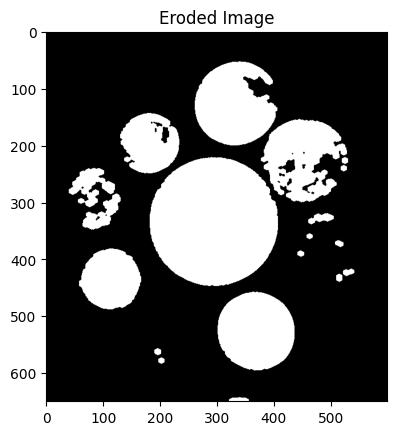

In [30]:
###
### YOUR CODE HERE
###
plt.imshow(imageEroded,cmap='gray');plt.title("Eroded Image");plt.show()
# Expected output

## <font style = "color:rgb(50,120,229)">Step 5: Create SimpleBlobDetector</font>

In [31]:
# Set up the SimpleBlobdetector with default parameters.
params = cv2.SimpleBlobDetector_Params()

params.blobColor = 0

params.minDistBetweenBlobs = 2

# Filter by Area.
params.filterByArea = False

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.8

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.8

# Filter by Inertia
params.filterByInertia =True
params.minInertiaRatio = 0.8

In [32]:
# Create SimpleBlobDetector
detector = cv2.SimpleBlobDetector_create(params)

## <font style = "color:rgb(50,120,229)">Step 6: Detect Coins</font>

### <font style = "color:rgb(8,133,37)">Hints</font>
Use **`detector.detect(image)`** to detect the blobs (coins). The output of the function is a list of **keypoints** where each keypoint is unique for each blob.

Print the number of coins detected as well.

In [33]:
# Detect blobs
###
### YOUR CODE HERE
###
pre_blob = imageEroded.copy()
if params.blobColor == 0:
    # If foreground is white, invert so blobs become dark
    white_ratio = pre_blob.mean() / 255.0
    if white_ratio > 0.5:
        pre_blob = cv2.bitwise_not(pre_blob)

keypoints = detector.detect(imageEroded)

In [34]:
# Print number of coins detected
###
### YOUR CODE HERE
###
print(f"Number of coins detected (Blob): {len(keypoints)}")

Number of coins detected (Blob): 2


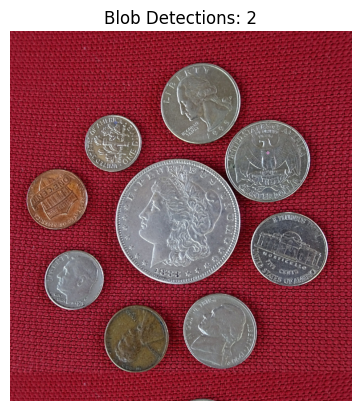

Number of coins detected (Contours): 5


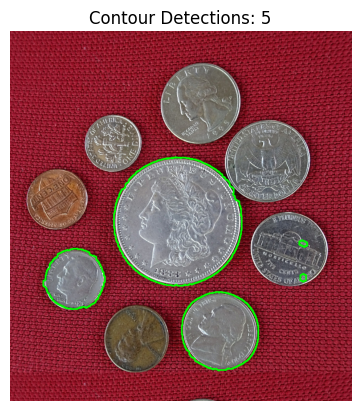

In [35]:
im_with_keypoints = cv2.drawKeypoints(imageCopy, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(im_with_keypoints[:,:,::-1]); plt.title(f"Blob Detections: {len(keypoints)}"); plt.axis('off'); plt.show()

cnts, _ = cv2.findContours(imageEroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

def contour_circularity(contour):
    area = cv2.contourArea(contour)
    peri = cv2.arcLength(contour, True)
    if peri == 0:
        return 0.0
    # Circularity = 4πA / P^2 ; close to 1 for circles
    return (4.0 * np.pi * area) / (peri * peri)

contours_kept = []
areas = []
for c in cnts:
    area = cv2.contourArea(c)
    circ = contour_circularity(c)
    # Heuristic filters: tweak as needed depending on image scale
    if area > 100 and circ > 0.65:
        contours_kept.append(c)
        areas.append(area)

contour_vis = imageCopy.copy()
cv2.drawContours(contour_vis, contours_kept, -1, (0,255,0), 2)
print(f"Number of coins detected (Contours): {len(contours_kept)}")

plt.imshow(contour_vis[:,:,::-1]); plt.title(f"Contour Detections: {len(contours_kept)}"); plt.axis('off'); plt.show()
